In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from IPython.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

from astropy.io import fits
import astropy.table as table

from astropy import units as u

from collections import Counter
import astropy.coordinates as coord

import matplotlib._color_data as mcd

This notebook is an example of the data/pm_overview.csv file
This file includes all (or most) measurements of the systemic proper motion of dwarf galaxies. 
This is useful for comparing new measurements to the literature.
Adding star clusters measurements to a long term todo. 

In [2]:
plt.style.use('../code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [3]:
## load from github
pm_data = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/pm_overview.csv')

In [4]:
## load locally
pm_data = table.Table.read('../data/pm_overview.csv')

This is code originally used in Pace et al 2022 that plots the literature sample of proper motion measurements and compares it to a new measurement.
This will need to be modified at some point to account for Gaia DR4 or HST measurements that are better than Gaia. 
https://ui.adsabs.harvard.edu/abs/2022ApJ...940..136P/abstract

In [5]:
## this makes 2-3 panels plots comparing literature (and new measurements with add=[])
## this also outputs the ref_cite + pmra + pmra_em + pmdec + pmdec_em
## the plots consider asymmetric errors in the data files
def plot_galaxy_3panel(key, pm_overview = pm_data, gaia_only=True, hst=False, add=[], **kwargs):
    pm_overview_gaia = pm_overview[np.logical_or(pm_overview['method']=='GAIA_EDR3', pm_overview['method']=='GAIA_DR2')]
    pm_overview_gaia_edr3 = pm_overview[pm_overview['method']=='GAIA_EDR3']
    error_option = kwargs.get('error_option', False)
    out2 = kwargs.get('out2', '')
    non_Gaia = kwargs.get('non_Gaia',False)
    
    if non_Gaia:
        fig, ax = plt.subplots(1,3,figsize=(18,5))
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,5))

    pm_overview2 = pm_overview[pm_overview['key']==key]
    print_pm = kwargs.get('print_pm',True)
    if print_pm:
        for kk in range(len(pm_overview2)):
            print(pm_overview2['ref_cite'][kk], pm_overview2['pmra'][kk], 
                      pm_overview2['pmra_em'][kk], pm_overview2['pmdec'][kk], pm_overview2['pmdec_em'][kk])
    keep = np.zeros(len(pm_overview2), dtype=bool)
    exclude = kwargs.get('exclude', [])
    for i in range(len(pm_overview2)):
        if pm_overview2['ref_cite'][i] in exclude:
            keep[i]=False
        else:
            keep[i]=True
    pm_overview2 = pm_overview2[keep]
    
    temp_color = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    for i in ['black', 'lightgreen', 'magenta', 'navy', 'gold', 'maroon']:
        temp_color.append(i)
    tot = len(list(mcd.XKCD_COLORS))
    x = np.random.choice(tot, tot)
    for x2 in x:
        temp_color.append(list(mcd.XKCD_COLORS)[x2])
    xkcd = 0

    if len(add)>0:
        for i in [0,1]:
            ax[i].errorbar(add[0], add[2], fmt='*',
                                  xerr=add[1], yerr=add[3],
                        label=r'${\rm This~Work}$', c=temp_color[xkcd], ms=10, zorder=1000)
        if non_Gaia:
            ax[2].errorbar(add[0], add[2], fmt='*',
                                  xerr=add[1], yerr=add[3],
                        label=r'${\rm This~Work}$', c=temp_color[xkcd], ms=10, zorder=1000)
        xkcd+=1
        
    for kk in range(len(pm_overview2)):
        if non_Gaia:
            ax[2].errorbar(pm_overview2['pmra'][kk], pm_overview2['pmdec'][kk], fmt='o',
                              xerr=[[pm_overview2['pmra_em'][kk]],[pm_overview2['pmra_ep'][kk]]],
                           yerr=[[pm_overview2['pmdec_em'][kk]], [pm_overview2['pmdec_ep'][kk]]],
                    label=pm_overview2['citation'][kk],c=temp_color[xkcd])
            
        if pm_overview2['method'][kk] in ['GAIA_EDR3', 'GAIA_DR2']:
            ax[1].errorbar(pm_overview2['pmra'][kk], pm_overview2['pmdec'][kk], fmt='o',
                          xerr=[[pm_overview2['pmra_em'][kk]], [pm_overview2['pmra_ep'][kk]]],
                           yerr=[[pm_overview2['pmdec_em'][kk]], [pm_overview2['pmdec_ep'][kk]]],
                label=pm_overview2['citation'][kk],c=temp_color[xkcd])
            if pm_overview2['method'][kk]=='GAIA_EDR3':
                ax[0].errorbar(pm_overview2['pmra'][kk], pm_overview2['pmdec'][kk], fmt='o',
                          xerr=[[pm_overview2['pmra_em'][kk]], [pm_overview2['pmra_ep'][kk]]], 
                               yerr=[[pm_overview2['pmdec_em'][kk]], [pm_overview2['pmdec_ep'][kk]]],
                label=pm_overview2['citation'][kk],c=temp_color[xkcd])
        xkcd+=1
    

    
    
#     ax[3].axis("off")
    for i in [0,1]:
        ax[i].set_xlabel(r'$\mu_{\alpha *}~({\rm mas~yr^{-1}})$', fontsize=15)
        ax[i].set_ylabel(r'$\mu_{\delta }~({\rm mas~yr^{-1}})$', fontsize=15)
        xvals,yvals = ax[i].axes.get_xlim(),ax[i].axes.get_ylim()

        xrange = xvals[1]-xvals[0]
        yrange = yvals[1]-yvals[0]
        ax[i].set_aspect((xrange/yrange)*.9, adjustable='box')
#         ax[i].set_box_aspect(1)
    ax[0].set_title(r'${\rm {\it Gaia}~EDR3}$')
    ax[1].set_title(r'${\rm All~{\it Gaia}}$')
    if non_Gaia:
        ax[2].set_xlabel(r'$\mu_{\alpha *}~({\rm mas~yr^{-1}})$', fontsize=15)
        ax[2].set_ylabel(r'$\mu_{\delta }~({\rm mas~yr^{-1}})$', fontsize=15)
        ax[2].set_title(r'${\rm All~Measurements}$')
        xvals,yvals = ax[2].axes.get_xlim(),ax[2].axes.get_ylim()

        xrange = xvals[1]-xvals[0]
        yrange = yvals[1]-yvals[0]
        ax[2].set_aspect((xrange/yrange)*.9, adjustable='box')
#     ax.set_box_aspect(1)
    
    if non_Gaia:
        lgd = ax[2].legend(fontsize=13, loc=(1,0))
    else:
        lgd = ax[1].legend(fontsize=13, loc=(1,0))
        
    plt.tight_layout()
    if len(out2)>0:
        plt.savefig(out2)#, bbox_extra_artists=(lgd,), bbox_inches='tight')
        
    plt.show()

Cerny2021ApJ...920L..44C 0.25 0.06 -0.1 0.05
Heiger2024ApJ...961..234H 0.22 0.06 -0.11 0.05


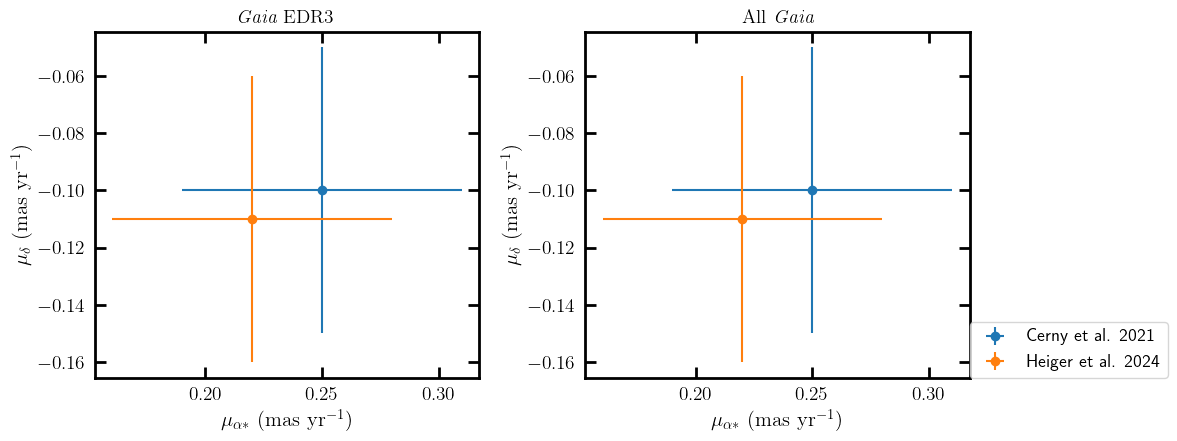

In [6]:
## example of UFD with only Gaia measurements 
plot_galaxy_3panel("eridanus_4",  non_Gaia=False,)

Battaglia2022A&A...657A..54B 0.04 0.01 -0.19 0.01
CasettiDinescu2016MNRAS.461..271C -0.284 0.047 -0.289 0.041
Fritz2018A&A...619A.103F -0.012 0.013 -0.158 0.015
Helmi2018A&A...616A..12G -0.019 0.009 -0.145 0.01
Li2021ApJ...916....8L 0.039 0.02 -0.181 0.02
MartinezGarcia2021MNRAS.505.5884M 0.035 0.007 -0.18 0.008
McConnachie2020AJ....160..124M -0.01 0.01 -0.14 0.01
McConnachie2020RNAAS...4..229M 0.042 0.005 -0.19 0.01
Pace2022ApJ...940..136P 0.044 0.006 -0.188 0.006
Pryor2015AJ....149...42P 0.177 0.063 -0.221 0.063
Qi2022MNRAS.512.5601Q 0.045 0.006 -0.188 0.006
Sohn2017ApJ...849...93S 0.0562 0.0099 -0.1765 0.01
Vitral2021MNRAS.504.1355V 0.032 0.008 -0.183 0.009
Warfield2023MNRAS.519.1189W 0.0458 0.0159 -0.1754 0.0152


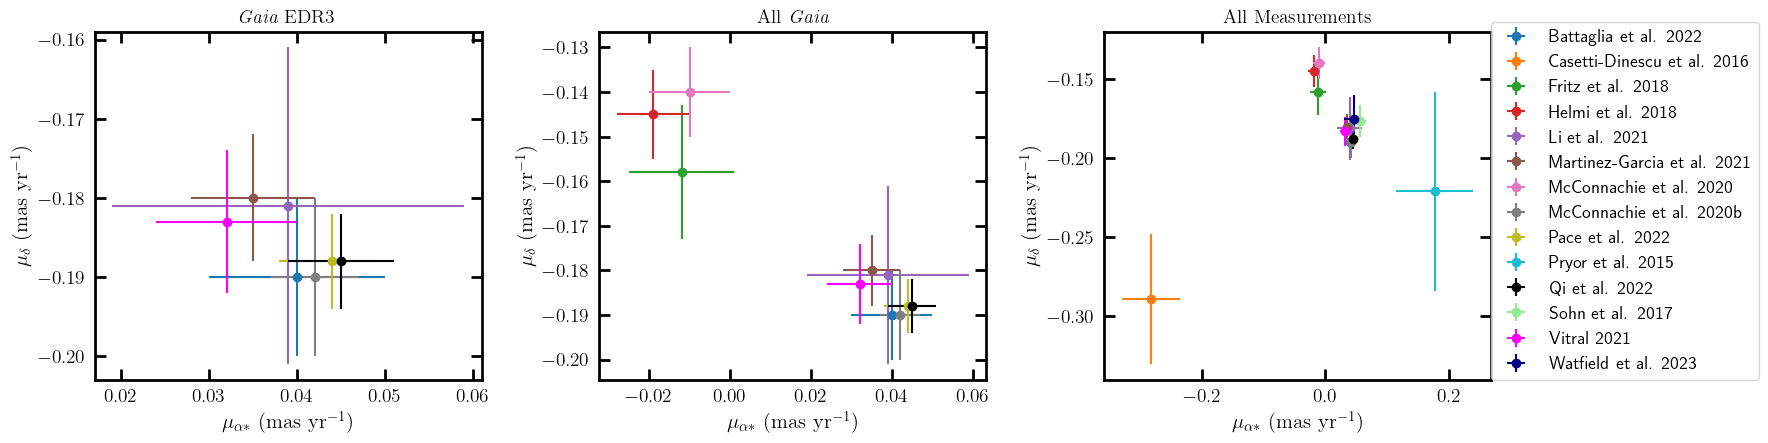

In [7]:
## example of dwarf with both Gaia and HST measurements 
plot_galaxy_3panel("draco_1",  non_Gaia=True,)

Battaglia2022A&A...657A..54B 0.04 0.01 -0.19 0.01
CasettiDinescu2016MNRAS.461..271C -0.284 0.047 -0.289 0.041
Fritz2018A&A...619A.103F -0.012 0.013 -0.158 0.015
Helmi2018A&A...616A..12G -0.019 0.009 -0.145 0.01
Li2021ApJ...916....8L 0.039 0.02 -0.181 0.02
MartinezGarcia2021MNRAS.505.5884M 0.035 0.007 -0.18 0.008
McConnachie2020AJ....160..124M -0.01 0.01 -0.14 0.01
McConnachie2020RNAAS...4..229M 0.042 0.005 -0.19 0.01
Pace2022ApJ...940..136P 0.044 0.006 -0.188 0.006
Pryor2015AJ....149...42P 0.177 0.063 -0.221 0.063
Qi2022MNRAS.512.5601Q 0.045 0.006 -0.188 0.006
Sohn2017ApJ...849...93S 0.0562 0.0099 -0.1765 0.01
Vitral2021MNRAS.504.1355V 0.032 0.008 -0.183 0.009
Warfield2023MNRAS.519.1189W 0.0458 0.0159 -0.1754 0.0152


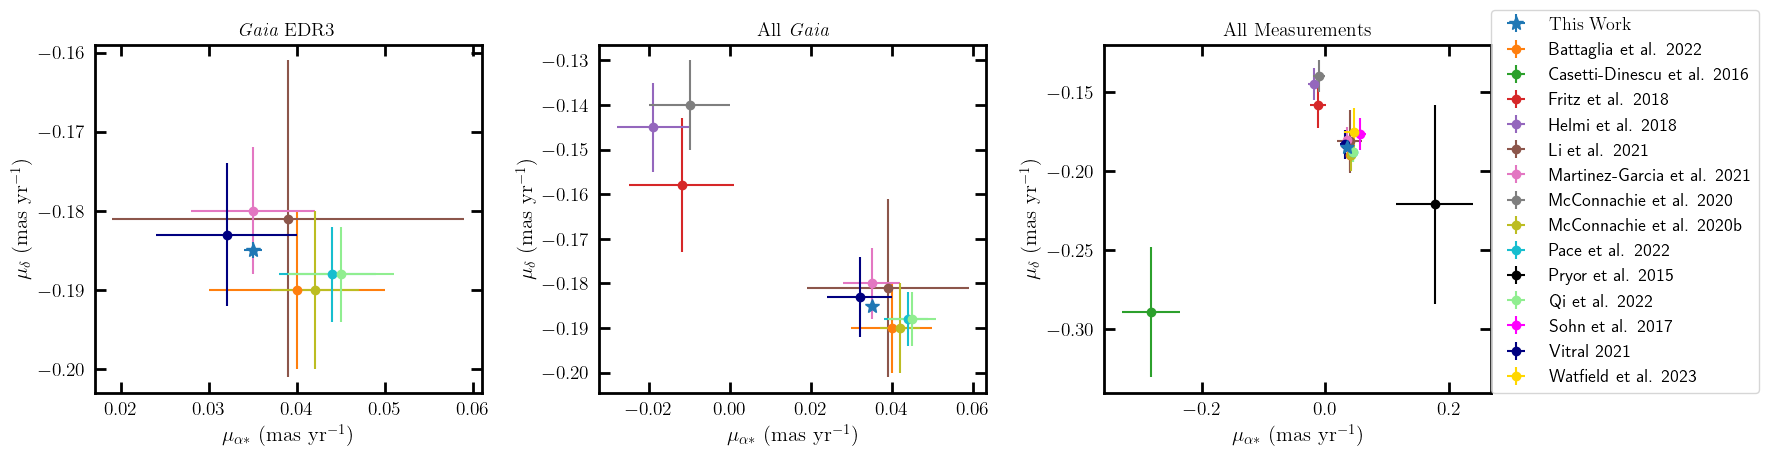

In [8]:
## example of adding a new measurement to the plot 
pmra_new = .035
pmra_new_error = .001
pmdec_new = -.185
pmdec_new_error = .001
## the new measurements doesn't have asymmetric errors 
plot_galaxy_3panel("draco_1",  non_Gaia=True,add=[pmra_new, pmra_new_error, pmdec_new, pmdec_new_error])

In [9]:
dsph_mw = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')

you can also use the other tables to loop over all the dwarf galaxies

antlia_2
Battaglia2022A&A...657A..54B -0.1 0.01 0.09 0.01
Chakrabarti2019ApJ...886...67C -0.068 0.023 0.032 0.031
Ji2021ApJ...921...32J -0.094 0.007 0.103 0.008
Li2021ApJ...916....8L -0.101 0.02 0.113 0.02
McConnachie2020AJ....160..124M -0.05 0.04 0.04 0.05
McConnachie2020RNAAS...4..229M -0.09 0.01 0.12 0.01
Pace2022ApJ...940..136P -0.093 0.008 0.1 0.009
Torrealba2019MNRAS.488.2743T -0.095 0.018 0.058 0.024


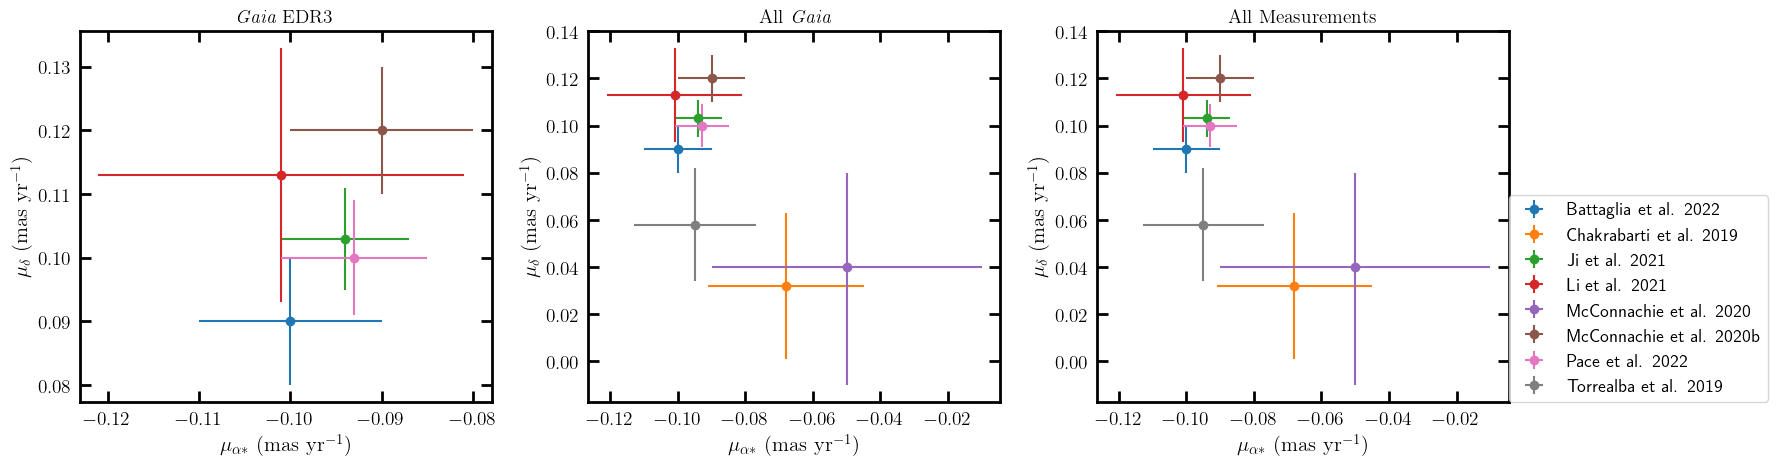

aquarius_2
Battaglia2022A&A...657A..54B -0.03 0.19 -0.47 0.16
Bruce2023ApJ...950..167B -0.27 0.12 -0.44 0.1
Fritz2018A&A...619A.103F -0.252 0.526 0.011 0.448
Kallivayalil2018ApJ...867...19K -0.491 0.306 -0.049 0.266
Li2021ApJ...916....8L 0.647 0.588 -0.298 0.548
McConnachie2020AJ....160..124M 0.0 0.16 -0.2 0.15
McConnachie2020RNAAS...4..229M -0.17 0.1 -0.43 0.08
Pace2022ApJ...940..136P -0.179 0.113 -0.466 0.095


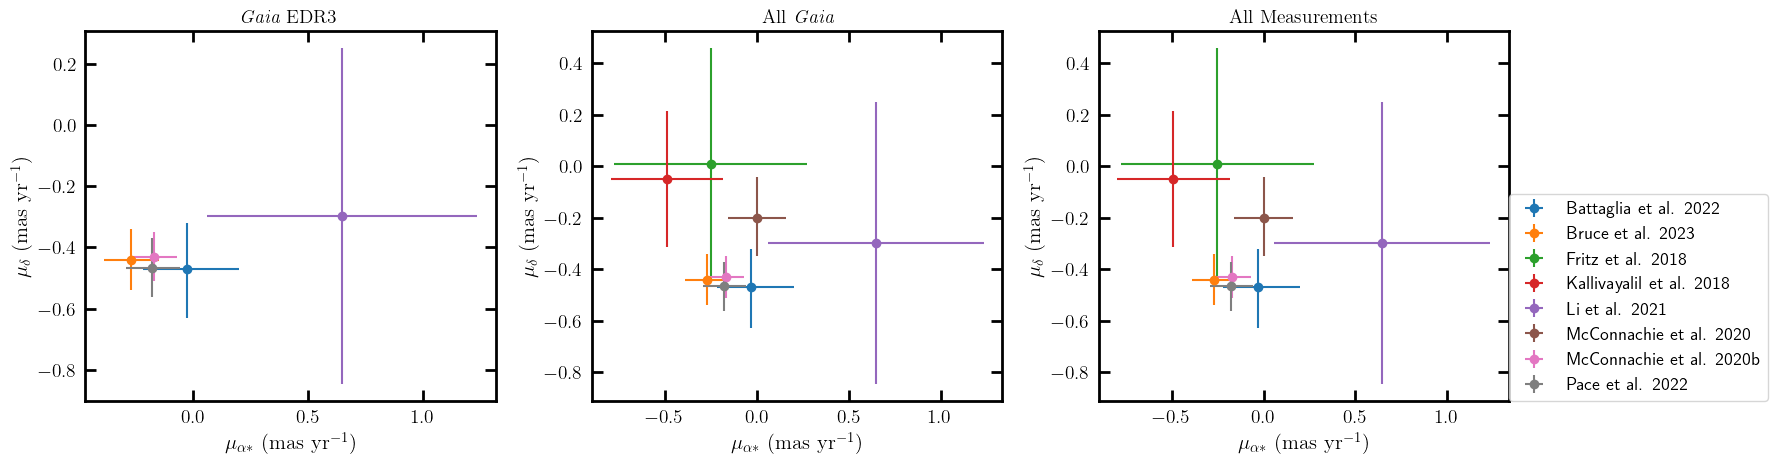

In [10]:
## only two galaxies here for an example
dsph_mw_short =dsph_mw[:2]
for key in dsph_mw_short['key']:
    print(key)
    plot_galaxy_3panel(key,  non_Gaia=True)
    